# COVID Vaccine Sentiment Analysis

**Group 7** - Laura Yuan, Yining Ou, Yue Ma

In [1]:
autosave 60

Autosaving every 60 seconds


In [2]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import csv

### Datasets

In [3]:
import pandas as pd
import numpy as np

In [4]:
tweets = pd.read_csv('vaccine_tweets.csv')
vacc_admin = pd.read_csv('vaccine_administration.csv')
deaths = pd.read_csv('covid_deaths.csv')
uscities = pd.read_csv('uscities.csv')

/Users/laurayuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218894 entries, 0 to 218893
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         218887 non-null  object 
 1   user_location     171795 non-null  object 
 2   user_description  206847 non-null  object 
 3   user_created      218888 non-null  object 
 4   user_followers    218887 non-null  float64
 5   user_friends      218887 non-null  object 
 6   user_favourites   218887 non-null  object 
 7   user_verified     218887 non-null  object 
 8   date              218885 non-null  object 
 9   text              218887 non-null  object 
 10  hashtags          157270 non-null  object 
 11  source            216489 non-null  object 
 12  is_retweet        218880 non-null  object 
dtypes: float64(1), object(12)
memory usage: 21.7+ MB


In [6]:
vacc_admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534 entries, 0 to 9533
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   county                        9534 non-null   object
 1   administered_date             9534 non-null   object
 2   total_doses                   9534 non-null   int64 
 3   cumulative_total_doses        9534 non-null   int64 
 4   pfizer_doses                  9534 non-null   int64 
 5   cumulative_pfizer_doses       9534 non-null   int64 
 6   moderna_doses                 9534 non-null   int64 
 7   cumulative_moderna_doses      9534 non-null   int64 
 8   jj_doses                      9534 non-null   int64 
 9   cumulative_jj_doses           9534 non-null   int64 
 10  partially_vaccinated          9534 non-null   int64 
 11  total_partially_vaccinated    9534 non-null   int64 
 12  fully_vaccinated              9534 non-null   int64 
 13  cumulative_fully_v

In [7]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605 entries, 0 to 7604
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   demographic_category      7605 non-null   object 
 1   demographic_value         7605 non-null   object 
 2   total_cases               7605 non-null   int64  
 3   percent_cases             7605 non-null   float64
 4   deaths                    7605 non-null   int64  
 5   percent_deaths            7605 non-null   float64
 6   percent_of_ca_population  7585 non-null   float64
 7   report_date               7605 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 475.4+ KB


### Data Cleaning

* Tweets dataset:

In [8]:
# Getting the columns we would like to analyze
tweets = tweets[["user_name","user_location","date","text"]]

In [9]:
# Dropping N/A
tweets = tweets.dropna()

In [10]:
# Incorrect date formats
tweets.date.sort_values(ascending = False).head(5)

# Delete rows with incorrect formats
tweets = tweets.drop([27431, 27431, 193231, 64306, 110776])

27431     ['southafricancoronavirus', 'CovidVaccine', 'l...
110776    ['SickleCell', 'thalassaemia', 'COVID19', 'Cov...
193231                                     ['CovidVaccine']
64306                                      ['CovidVaccine']
4127                                       31-08-2020 23:43
Name: date, dtype: object

In [11]:
# Splitting date to separate date and time
tweets[['date','time']] = tweets['date'].str.split(expand=True,)
tweets = tweets.drop(columns = 'time')

# Formatting date
tweets['date'] = pd.to_datetime(tweets['date'], infer_datetime_format= True, errors='ignore')

# Reset index
tweets = tweets.reset_index(drop = True)

Using FlashGeoText

In [12]:
# Cleaning user_location data
import re

def fix_irregulars(locations):
    if 'nyc'in locations:
        return 'New York, NY, United States'
    elif 'NYC' in locations:
        return 'New York, NY, United States'
    elif 'ew York'in locations:
        return 'New York, NY, United States'
    elif 'ondon'in locations:
        return 'London, United Kingdom'
    elif 'ntario' in locations:
        return 'Toronto, Canada'
    elif 'oronto' in locations:
        return 'Toronto, Canada'
    elif 'Delhi' in locations:
        return 'New Delhi, India'
    elif 'England' in locations:
        return 'England, United Kingdom'
    elif 'California' in locations:
        return 'CA, United States'
    elif 'Mumbai' in locations:
        return 'Mumbai, India'
    elif 'Los Angeles' in locations:
        return 'Los Angeles, CA, United States'
    elif 'Scotland' in locations:
        return 'Scotland, United Kingdom'
    elif 'Melbourne' in locations:
        return 'Melbourne, Australia'
    elif 'D.C.' in locations:
        return 'Washington, DC, United States'
    elif 'DC' in locations:
        return 'Washington, DC, United States'
    elif 'Texas' in locations:
        return 'TX, United States'
    elif 'Bangalore' in locations:
        return 'Bangalore, India'
    elif 'Chicago' in locations:
        return 'Chicago, IL, United States'
    elif 'Chennai' in locations:
        return 'Chennai, India'
    elif 'San Francisco' in locations:
        return 'San Francisco, CA, United States'
    elif 'Hyderabad' in locations:
        return 'Hyderabad, India'
    elif 'Jersey' in locations:
        return 'NJ, United States'
    elif 'Boston' in locations:
        return 'Boston, MA, United States'
    elif 'Orlando' in locations:
        return 'Orlando, FL, United States'
    elif 'Florida' in locations:
        return 'FL, United States'
    elif 'Nottingham' in locations:
        return 'Nottingham, England, United Kingdom'
    elif 'Arizona' in locations:
        return 'AZ, United States'
    elif 'San Diego' in locations:
        return 'San Diego, CA, United States'
    elif 'Colorado' in locations:
        return 'CO, United States'
    elif 'Ohio' in locations:
        return 'OH, United States'
    elif 'Michigan' in locations:
        return 'MI, United States'
    elif 'Atlanta' in locations:
        return 'Atlanta, GA, United States'
    elif 'Sydney' in locations:
        return 'Sydney, Australia'
    elif 'Manchester' in locations:
        return 'Manchester, England, United Kingdom'
    elif 'Pennsylvania' in locations:
        return 'PA, United States'
    elif 'Johannesburg' in locations:
        return 'Johannesburg, South Africa'
    elif 'Philadelphia' in locations:
        return 'Philadelphia, PA, United States'
    elif 'Calgary' in locations:
        return 'Calgary, Canada'
    elif 'Dublin' in locations:
        return 'Dublin, Ireland'
    elif 'INDIA' in locations:
        return locations.replace('INDIA','India')
    elif 'Nashville' in locations:
        return 'Nashville, TN, United States'
    elif 'Punjab' in locations:
        return 'Punjab, India'
    elif 'Oregon' in locations:
        return 'OR, United States'
    elif 'Seattle' in locations:
        return 'Seattle, WA, United States'
    elif 'USA' in locations:
        return locations.replace('USA','United States')
    elif 'Maryland' in locations:
        return 'MD, United States'
    elif re.search(r'(,+\s+[A-Z]{2})', locations):
        return locations + ', United States'
    else:
        return locations

tweets['user_location'] = tweets.user_location.apply(lambda x: fix_irregulars(x))

In [13]:
# Function to get state from city
def get_state(user_loc):
    state = re.findall(r'(\s+[A-Z]{2})', user_loc)
    if len(state) >=1:
        return state[0].strip()
    else:
        return np.nan
    
states = tweets.user_location.apply(lambda x: get_state(x))
tweets['state'] = states

In [14]:
# Extracting/cleaning location from user_location
#!pip install flashgeotext
#!pip install geotext
from flashgeotext.geotext import GeoText
geotext = GeoText()

# Getting entities of each tweet
def get_location(column):
    location = geotext.extract(input_text=column, span_info=False)
    return location

# Applying Get_Location
tweets['location'] = tweets['user_location'].apply(lambda x: get_location(x))

In [15]:
# Creating function to return city, state and country
def get_city(loc_type):
    cities = loc_type['cities'].keys()
    for city in cities:
        return city

def get_country(loc_type):
    countries = loc_type['countries'].keys()
    for country in countries:
        return country

# Creating city and country columns
cities = tweets.location.apply(lambda x: get_city(x))
countries = tweets.location.apply(lambda x: get_country(x))

# Adding to tweets dataframe
tweets['city'] = cities
tweets['country'] = countries

In [16]:
# Removing 'Inđija' due to geotext error
tweets['city'] = tweets['city'].replace(['Inđija'], np.nan)

# Changing SF El Alto to just San Francisco
tweets['city'] = tweets['city'].replace(['San Francisco El Alto'], 'San Francisco')

In [17]:
tweets[['user_location','location','city','state','country']].head(6)

,user_location,location,city,state,country
0,Assam,"{'cities': {}, 'countries': {}}",None,NaN,None
1,"Adelaide, South Australia","{'cities': {'Adelaide': {'count': 1}}, 'countr...",Adelaide,NaN,Australia
2,"Hyderabad, India","{'cities': {'Hyderabad': {'count': 1}, 'Inđija...",Hyderabad,NaN,India
3,The Great Pacific Northwest,"{'cities': {}, 'countries': {}}",None,NaN,None
4,"Washington, DC, United States","{'cities': {'Washington, D.C.': {'count': 1}},...","Washington, D.C.",DC,United States
5,"Nashville, TN, United States","{'cities': {'Nashville': {'count': 1}}, 'count...",Nashville,TN,United States


In [18]:
# Dropping unwanted columns
tweets = tweets.drop(columns = ['user_location','location'])
tweets = tweets[['user_name','date','text','city','state','country']]

tweets.head()

,user_name,date,text,city,state,country
0,MyNewsNE,2020-08-18,Australia to Manufacture Covid-19 Vaccine and ...,None,NaN,None
1,Ann-Maree O’Connor,2020-08-18,@michellegrattan @ConversationEDU This is what...,Adelaide,NaN,Australia
2,Rajesh Tadepalli,2020-08-18,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,Hyderabad,NaN,India
3,AKisASocialisolationist wash yer damn hands,2020-08-18,"@MSNBC Well, let’s qualify that: would anyone ...",None,NaN,None
4,Dr. Joseph Santoro,2020-08-18,"Most countries, without the ability to make #V...","Washington, D.C.",DC,United States


* Deaths dataset:

In [19]:
# Removing unknown demographics
deaths = deaths[deaths['demographic_value'] != 'Missing']
deaths = deaths[deaths['demographic_value'] != 'missing']
deaths = deaths[deaths['demographic_value'] != 'Total']

# Formatting date
deaths['report_date'] = pd.to_datetime(deaths['report_date'], infer_datetime_format= True, errors='ignore')

* CA Cities/Counties dataset:

In [20]:
cacities = uscities[['city','state_id','county_name']]
cacities = cacities[cacities['state_id'] == 'CA']
cacities.head()

,city,state_id,county_name
1,Los Angeles,CA,Los Angeles
12,San Francisco,CA,San Francisco
14,San Diego,CA,San Diego
20,Riverside,CA,Riverside
26,Sacramento,CA,Sacramento


* Vaccine Administration:

In [21]:
# Formatting date
vacc_admin['administered_date'] = pd.to_datetime(vacc_admin['administered_date'], infer_datetime_format= True, errors='ignore')

#### Extracting California Users

In [22]:
cali_tweets = tweets[tweets['state'] == 'CA']
cali_tweets.head()

,user_name,date,text,city,state,country
42,City Visions Radio,2020-08-18,Now at https://t.co/86d419hWQF Peter Chin-Hong...,San Francisco,CA,United States
43,Dov Samuel,2020-08-17,Pfizer is looking to sign up people for a covi...,Los Angeles,CA,United States
44,Immigration & Citizenship Program,2020-08-17,#immigration #COVID19 #CovidVaccine #2020Censu...,San Jose,CA,United States
65,RomeshNadir🇮🇳,2020-08-17,India silently on the job of giving the world ...,San Francisco,CA,United States
90,PlushCare,2020-08-17,There's constant buzz about developments with ...,San Francisco,CA,United States


In [23]:
cali_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5669 entries, 42 to 171723
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_name  5669 non-null   object        
 1   date       5669 non-null   datetime64[ns]
 2   text       5669 non-null   object        
 3   city       5434 non-null   object        
 4   state      5669 non-null   object        
 5   country    5589 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 310.0+ KB


* Vaccine Administration:

In [24]:
# Formatting date
vacc_admin['administered_date'] = pd.to_datetime(vacc_admin['administered_date'], infer_datetime_format= True, errors='ignore')

### Final Datasets

In [25]:
cali_tweets.head()

,user_name,date,text,city,state,country
42,City Visions Radio,2020-08-18,Now at https://t.co/86d419hWQF Peter Chin-Hong...,San Francisco,CA,United States
43,Dov Samuel,2020-08-17,Pfizer is looking to sign up people for a covi...,Los Angeles,CA,United States
44,Immigration & Citizenship Program,2020-08-17,#immigration #COVID19 #CovidVaccine #2020Censu...,San Jose,CA,United States
65,RomeshNadir🇮🇳,2020-08-17,India silently on the job of giving the world ...,San Francisco,CA,United States
90,PlushCare,2020-08-17,There's constant buzz about developments with ...,San Francisco,CA,United States


In [26]:
tweets.head()

,user_name,date,text,city,state,country
0,MyNewsNE,2020-08-18,Australia to Manufacture Covid-19 Vaccine and ...,None,NaN,None
1,Ann-Maree O’Connor,2020-08-18,@michellegrattan @ConversationEDU This is what...,Adelaide,NaN,Australia
2,Rajesh Tadepalli,2020-08-18,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,Hyderabad,NaN,India
3,AKisASocialisolationist wash yer damn hands,2020-08-18,"@MSNBC Well, let’s qualify that: would anyone ...",None,NaN,None
4,Dr. Joseph Santoro,2020-08-18,"Most countries, without the ability to make #V...","Washington, D.C.",DC,United States


In [27]:
vacc_admin.head()

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,california_flag
0,All CA Counties,2020-12-15,1136,1136,1136,1136,0,0,0,0,1136,1136,0,0,1136,1136,NaN
1,All CA Counties,2020-12-16,8370,9506,8370,9506,0,0,0,0,8370,9506,0,0,8370,9506,NaN
2,All CA Counties,2020-12-17,25814,35320,25814,35320,0,0,0,0,25816,35322,0,0,25816,35322,NaN
3,All CA Counties,2020-12-18,43836,79156,43780,79100,56,56,0,0,43837,79159,0,0,43837,79159,NaN
4,All CA Counties,2020-12-19,25314,104470,25290,104390,24,80,0,0,25313,104471,1,1,25313,104472,NaN


In [28]:
deaths.head()

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
0,Age Group,0-17,855,2.3,0,0.0,22.5,2020-04-22
1,Age Group,0-17,936,2.4,0,0.0,22.5,2020-04-23
2,Age Group,0-17,1011,2.5,0,0.0,22.5,2020-04-24
3,Age Group,0-17,1039,2.5,0,0.0,22.5,2020-04-25
4,Age Group,0-17,1085,2.5,0,0.0,22.5,2020-04-26


### Data Exploration

* California Total Vaccinations

<AxesSubplot:xlabel='administered_date', ylabel='cumulative_pfizer_doses'>

<AxesSubplot:xlabel='administered_date', ylabel='cumulative_pfizer_doses'>

[Text(0.5, 1.0, 'Vaccinations Over Time (California)'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cumulative Doses')]

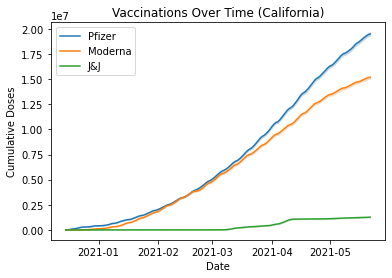

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

total_vacc = vacc_admin[vacc_admin['california_flag'].isna() == True]

sns.lineplot(x = "administered_date", y = "cumulative_pfizer_doses", data = total_vacc, label = 'Pfizer')
sns.lineplot(x = "administered_date", y = "cumulative_moderna_doses", data = total_vacc, label = 'Moderna')
sns.lineplot(x = "administered_date", y = "cumulative_jj_doses", data = total_vacc, label = 'J&J')\
    .set(title = 'Vaccinations Over Time (California)', xlabel = 'Date', ylabel = 'Cumulative Doses')

* Cases Demographics by Age

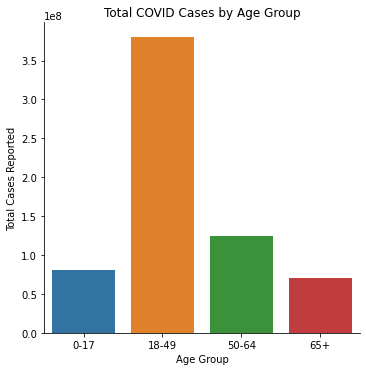

In [30]:
age = deaths[deaths['demographic_category'] == 'Age Group'].groupby('demographic_value', as_index=False)\
                                                           .agg({'total_cases':'sum','deaths':'sum'})\

age_cases = sns.catplot(x='demographic_value', y='total_cases', data=age, kind='bar')\
              .set(title = 'Total COVID Cases by Age Group', xlabel = 'Age Group', ylabel = 'Total Cases Reported')

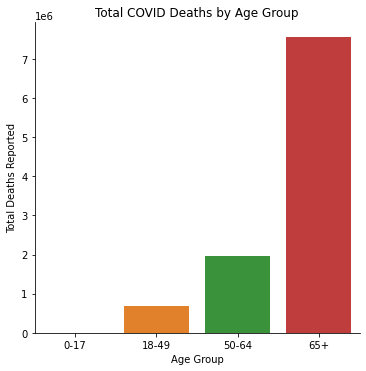

In [31]:
age_deaths = sns.catplot(x='demographic_value', y='deaths', data=age, kind='bar')\
              .set(title = 'Total COVID Deaths by Age Group', xlabel = 'Age Group', ylabel = 'Total Deaths Reported')

* Cases Demographics by Race

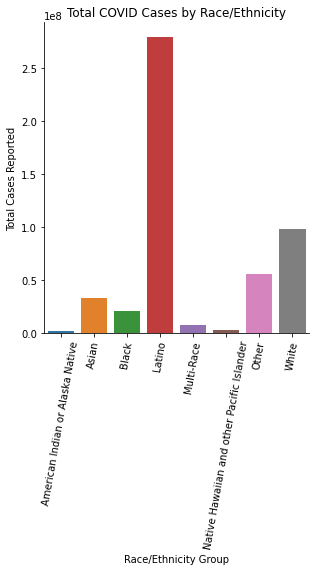

In [32]:
race = deaths[deaths['demographic_category'] == 'Race Ethnicity'].groupby('demographic_value', as_index=False)\
                                                           .agg({'total_cases':'sum','deaths':'sum'})\

race_demo = sns.catplot(x='demographic_value', y='total_cases', data=race, kind='bar')\
              .set(title = 'Total COVID Cases by Race/Ethnicity', xlabel = 'Race/Ethnicity Group', ylabel = 'Total Cases Reported')\
              .set_xticklabels(rotation=80)

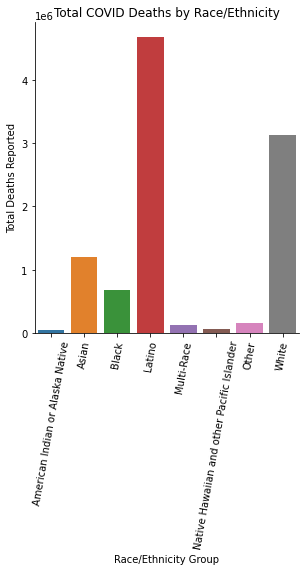

In [33]:
race_demo = sns.catplot(x='demographic_value', y='deaths', data=race, kind='bar')\
              .set(title = 'Total COVID Deaths by Race/Ethnicity', xlabel = 'Race/Ethnicity Group', ylabel = 'Total Deaths Reported')\
              .set_xticklabels(rotation=80)

### Merging Datasets

In [34]:
# California vaccination administrations dataset
cali_vacc = vacc_admin[vacc_admin['california_flag'].isna() == False]
cali_vacc = cali_vacc[cali_vacc['county'] != 'Outside California']
cali_vacc = cali_vacc[cali_vacc['county'] != 'Unknown']
cali_vacc = cali_vacc.drop(columns = 'california_flag')

In [35]:
# Merging California tweets with county/geographic details
cali = cali_tweets.merge(cacities, on='city', how = 'left',copy = False)
cali = cali.drop(columns = 'state_id')
cali.head()

,user_name,date,text,city,state,country,county_name
0,City Visions Radio,2020-08-18,Now at https://t.co/86d419hWQF Peter Chin-Hong...,San Francisco,CA,United States,San Francisco
1,Dov Samuel,2020-08-17,Pfizer is looking to sign up people for a covi...,Los Angeles,CA,United States,Los Angeles
2,Immigration & Citizenship Program,2020-08-17,#immigration #COVID19 #CovidVaccine #2020Censu...,San Jose,CA,United States,Santa Clara
3,RomeshNadir🇮🇳,2020-08-17,India silently on the job of giving the world ...,San Francisco,CA,United States,San Francisco
4,PlushCare,2020-08-17,There's constant buzz about developments with ...,San Francisco,CA,United States,San Francisco


In [36]:
# Merging California tweets with county demographics by date
cali_vacc = cali.merge(vacc_admin[['administered_date','county','cumulative_total_doses']], left_on = ['date','county_name'], right_on = ['administered_date','county'], how = 'inner')
cali_vacc = cali_vacc.drop(columns = ['administered_date','county_name'])

In [37]:
# Merging with deaths dataset
deaths_total = deaths.groupby('report_date', as_index = False)['deaths'].sum()
cali_data = cali_vacc.merge(deaths_total[['report_date','deaths']], left_on='date', right_on='report_date', how='inner')
cali_data = cali_data.drop(columns = 'report_date')

In [38]:
cali_data.head()

,user_name,date,text,city,state,country,county,cumulative_total_doses,deaths
0,"Vaneet K Sandhu, MD",2020-12-26,Looking forward to #dosetwo of the #CovidVacci...,Loma Linda,CA,United States,San Bernardino,16982,72054
1,strix1 🐬 🐾♻️,2020-12-26,#Smokers? Smokers have priority over me? They ...,San Diego,CA,United States,San Diego,28406,72054
2,Pranav Garimella,2020-12-26,If you are able to receive the #CovidVaccine p...,San Diego,CA,United States,San Diego,28406,72054
3,Berkeley Limketkai,2020-12-26,Got #CovidVaccine today and experiencing nothi...,Los Angeles,CA,United States,Los Angeles,87858,72054
4,jshinPROmax,2020-12-26,"Day 4 - arm is not as sore, mild headache \n\n...",Los Angeles,CA,United States,Los Angeles,87858,72054


* Doses vs. Deaths

[Text(0.5, 1.0, 'Doses vs. Deaths'),
 Text(0.5, 0, 'Cumulative Doses'),
 Text(0, 0.5, 'Deaths')]

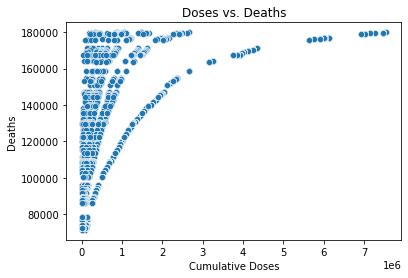

In [39]:
sns.scatterplot(x = "cumulative_total_doses", y = "deaths", data = cali_data)\
    .set(title = 'Doses vs. Deaths', xlabel = 'Cumulative Doses', ylabel = 'Deaths')

### Extracting Sentiment for California

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from tqdm.auto import tqdm
from tqdm import tqdm
import string
tqdm.pandas()

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

/Users/laurayuan/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [41]:
def get_tokens(text):
    res = []
    words = word_tokenize(text.lower())
    for word in words:
        if word not in stop_words and word not in string.punctuation:
           res.append(PorterStemmer().stem(word)) 
    return res

In [42]:
cali_data['tokens'] = cali_data.text.progress_apply(lambda x: get_tokens(x))

100%|██████████| 4587/4587 [00:03<00:00, 1266.36it/s]


In [43]:
cali_data.head()

,user_name,date,text,city,state,country,county,cumulative_total_doses,deaths,tokens
0,"Vaneet K Sandhu, MD",2020-12-26,Looking forward to #dosetwo of the #CovidVacci...,Loma Linda,CA,United States,San Bernardino,16982,72054,"[look, forward, dosetwo, covidvaccin, minu, tw..."
1,strix1 🐬 🐾♻️,2020-12-26,#Smokers? Smokers have priority over me? They ...,San Diego,CA,United States,San Diego,28406,72054,"[smoker, smoker, prioriti, smoke, amp, comprom..."
2,Pranav Garimella,2020-12-26,If you are able to receive the #CovidVaccine p...,San Diego,CA,United States,San Diego,28406,72054,"[abl, receiv, covidvaccin, pleas, ucsdhealth, ..."
3,Berkeley Limketkai,2020-12-26,Got #CovidVaccine today and experiencing nothi...,Los Angeles,CA,United States,Los Angeles,87858,72054,"[got, covidvaccin, today, experienc, noth, unusu]"
4,jshinPROmax,2020-12-26,"Day 4 - arm is not as sore, mild headache \n\n...",Los Angeles,CA,United States,Los Angeles,87858,72054,"[day, 4, arm, sore, mild, headach, covidvaccin..."


In [44]:
with open('/Users/laurayuan/Desktop/School/Masters/Spring_2021/NLP/Harvard_Inquirer_Dictionary.txt', 'r') as dt_txt:
    HIDict = dt_txt.readlines()
HIDict = HIDict[1:]

In [45]:
#Extract all the lines that contain the Pos tag

poswords = [j for j in HIDict if "Pos" in j]  #using a list comprehension
poswords = [j.split()[0] for j in poswords]
poswords = [j.split("#")[0] for j in poswords]
poswords = set(PorterStemmer().stem(j.lower()) for j in poswords)

#Extract all the lines that contain the Neg tag
negwords = [j for j in HIDict if "Neg" in j]  #using a list comprehension
negwords = [j.split()[0] for j in negwords]
negwords = [j.split("#")[0] for j in negwords]
negwords = set(PorterStemmer().stem(j.lower()) for j in negwords)

In [46]:
def get_pos(tokens):
    res = []
    for t in tokens:
        if t in poswords:
            res.append(t)
    return res    

def get_neg(tokens):
    res = []
    for t in tokens:
        if t in negwords:
            res.append(t)
    return res 

In [47]:
cali_data['pos_words']= cali_data.tokens.apply(lambda x: get_pos(x))
cali_data['neg_words']= cali_data.tokens.apply(lambda x: get_neg(x))

In [48]:
cali_data['pos_count'] = cali_data.pos_words.apply(lambda x: len(x))
cali_data['neg_count'] = cali_data.neg_words.apply(lambda x: len(x))

In [49]:
# Drop unwanted columns
cali_data = cali_data.drop(columns = ['tokens','pos_words','neg_words'])

In [50]:
cali_data['percent_pos'] = cali_data['pos_count'] / (cali_data['pos_count'] + cali_data['neg_count'])
cali_data['percent_neg'] = cali_data['neg_count'] / (cali_data['pos_count'] + cali_data['neg_count'])

In [51]:
cali_data.head()

,user_name,date,text,city,state,country,county,cumulative_total_doses,deaths,pos_count,neg_count,percent_pos,percent_neg
0,"Vaneet K Sandhu, MD",2020-12-26,Looking forward to #dosetwo of the #CovidVacci...,Loma Linda,CA,United States,San Bernardino,16982,72054,1,0,1.000000,0.000000
1,strix1 🐬 🐾♻️,2020-12-26,#Smokers? Smokers have priority over me? They ...,San Diego,CA,United States,San Diego,28406,72054,2,0,1.000000,0.000000
2,Pranav Garimella,2020-12-26,If you are able to receive the #CovidVaccine p...,San Diego,CA,United States,San Diego,28406,72054,2,0,1.000000,0.000000
3,Berkeley Limketkai,2020-12-26,Got #CovidVaccine today and experiencing nothi...,Los Angeles,CA,United States,Los Angeles,87858,72054,0,2,0.000000,1.000000
4,jshinPROmax,2020-12-26,"Day 4 - arm is not as sore, mild headache \n\n...",Los Angeles,CA,United States,Los Angeles,87858,72054,1,2,0.333333,0.666667


In [52]:
cali_data.nunique()

user_name                 2522
date                        81
text                      4587
city                       218
state                        1
country                      1
county                      36
cumulative_total_doses     876
deaths                      80
pos_count                    9
neg_count                   10
percent_pos                 31
percent_neg                 31
dtype: int64

### Analysis

* County Sentiment:

In [53]:
county_sent = cali_data.groupby('county').agg({'cumulative_total_doses':'sum','deaths':'sum','percent_pos':'mean'})\
                                                           .sort_values(by = 'deaths', ascending = False)

county_sent.head()

,cumulative_total_doses,deaths,percent_pos
county,,,
Los Angeles,4059770460,253284083,0.569917
San Francisco,189902708,106149896,0.596262
San Diego,337688973,58223011,0.587036
Orange,203490112,45284675,0.522773
Alameda,96835749,32813881,0.598625


In [54]:
county_sent = cali_data.groupby('county').agg({'cumulative_total_doses':'sum','deaths':'sum','percent_pos':'mean'})\
                                                           .sort_values(by = 'percent_pos',ascending = False)

county_sent.head()

,cumulative_total_doses,deaths,percent_pos
county,,,
San Benito,3749,119888,1.000000
Imperial,2794,86377,1.000000
Merced,8902,105948,1.000000
Tulare,400534,561220,0.833333
Marin,613149,837798,0.760000


In [55]:
county_sent = cali_data.groupby('county').agg({'cumulative_total_doses':'sum','deaths':'sum','percent_pos':'mean'})\
                                                           .sort_values(by = 'percent_pos',ascending = True)

county_sent.head()

,cumulative_total_doses,deaths,percent_pos
county,,,
Santa Cruz,234354,251680,0.000000
Kings,32072,167347,0.000000
Humboldt,142591,659293,0.300000
Monterey,766014,1379553,0.408333
Kern,1640959,1452939,0.435185


[Text(0.5, 1.0, 'Doses vs. Deaths'),
 Text(0.5, 0, 'Cumulative Doses'),
 Text(0, 0.5, 'Deaths')]

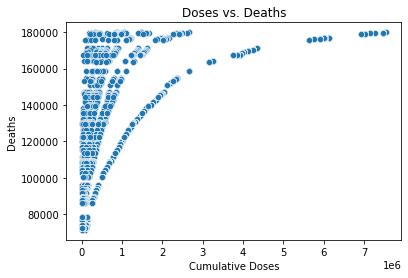

In [56]:
sns.scatterplot(x = "cumulative_total_doses", y = "deaths", data = cali_data)\
    .set(title = 'Doses vs. Deaths', xlabel = 'Cumulative Doses', ylabel = 'Deaths')

### Multicollinearity:

In [57]:
cali_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4586
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_name               4587 non-null   object        
 1   date                    4587 non-null   datetime64[ns]
 2   text                    4587 non-null   object        
 3   city                    4587 non-null   object        
 4   state                   4587 non-null   object        
 5   country                 4562 non-null   object        
 6   county                  4587 non-null   object        
 7   cumulative_total_doses  4587 non-null   int64         
 8   deaths                  4587 non-null   int64         
 9   pos_count               4587 non-null   int64         
 10  neg_count               4587 non-null   int64         
 11  percent_pos             4038 non-null   float64       
 12  percent_neg             4038 non-null   float64 

In [58]:
mult = cali_data[['cumulative_total_doses','deaths','percent_pos']]
#mult = pd.get_dummies(data=mult, columns = ['county'], drop_first = True, dummy_na = True)

In [59]:
# Source: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    # Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [60]:
print("Top Correlations between Variables:")
print(get_top_abs_correlations(mult, 20))

Top Correlations between Variables:
cumulative_total_doses  deaths         0.603767
deaths                  percent_pos    0.039459
cumulative_total_doses  percent_pos    0.012439
dtype: float64


### Extracting Tweets for Each Vaccine Brand

* Pfizer:

In [61]:
pfizer = tweets[tweets['text'].str.contains('pfizer')]

In [62]:
pfizer['tokens'] = pfizer.text.progress_apply(lambda x: get_tokens(x))

100%|██████████| 1208/1208 [00:01<00:00, 1056.57it/s]
<ipython-input-62-407ab589ba78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfizer['tokens'] = pfizer.text.progress_apply(lambda x: get_tokens(x))


In [63]:
pfizer['pos_words']= pfizer.tokens.apply(lambda x: get_pos(x))
pfizer['neg_words']= pfizer.tokens.apply(lambda x: get_neg(x))

pfizer['pos_count'] = pfizer.pos_words.apply(lambda x: len(x))
pfizer['neg_count'] = pfizer.neg_words.apply(lambda x: len(x))

# Drop unwanted columns
pfizer = pfizer.drop(columns = ['pos_words','neg_words'])

pfizer['total_count'] = pfizer.tokens.apply(lambda x: len(x))
pfizer['percent_pos'] = pfizer['pos_count'] / (pfizer['total_count'])
pfizer['percent_neg'] = pfizer['neg_count'] / (pfizer['total_count'])

<ipython-input-63-204732509ebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfizer['pos_words']= pfizer.tokens.apply(lambda x: get_pos(x))
<ipython-input-63-204732509ebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfizer['neg_words']= pfizer.tokens.apply(lambda x: get_neg(x))
<ipython-input-63-204732509ebe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [64]:
pfizer_pos = pfizer.percent_pos.mean()
pfizer_neg = pfizer.percent_neg.mean()

* Moderna:

In [65]:
moderna = tweets[tweets['text'].str.contains('moderna')]

In [66]:
moderna['tokens'] = moderna.text.progress_apply(lambda x: get_tokens(x))

100%|██████████| 1025/1025 [00:01<00:00, 977.99it/s]
<ipython-input-66-6f9b69308e70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderna['tokens'] = moderna.text.progress_apply(lambda x: get_tokens(x))


In [67]:
moderna['pos_words']= moderna.tokens.apply(lambda x: get_pos(x))
moderna['neg_words']= moderna.tokens.apply(lambda x: get_neg(x))

moderna['pos_count'] = moderna.pos_words.apply(lambda x: len(x))
moderna['neg_count'] = moderna.neg_words.apply(lambda x: len(x))

# Drop unwanted columns
moderna = moderna.drop(columns = ['pos_words','neg_words'])

moderna['total_count'] = moderna.tokens.apply(lambda x: len(x))
moderna['percent_pos'] = moderna['pos_count'] / (moderna['total_count'])
moderna['percent_neg'] = moderna['neg_count'] / (moderna['total_count'])

<ipython-input-67-a412d564b453>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderna['pos_words']= moderna.tokens.apply(lambda x: get_pos(x))
<ipython-input-67-a412d564b453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderna['neg_words']= moderna.tokens.apply(lambda x: get_neg(x))
<ipython-input-67-a412d564b453>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [68]:
moderna_pos = moderna.percent_pos.mean()
moderna_neg = moderna.percent_neg.mean()

* Johnson & Johnson:

In [69]:
jj = tweets[tweets['text'].str.contains('johnson' or 'j&')]

In [70]:
len(jj)

149

In [71]:
jj['tokens'] = jj.text.progress_apply(lambda x: get_tokens(x))

100%|██████████| 149/149 [00:00<00:00, 1027.74it/s]
<ipython-input-71-87a42cd4376a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jj['tokens'] = jj.text.progress_apply(lambda x: get_tokens(x))


In [72]:
jj['pos_words']= jj.tokens.apply(lambda x: get_pos(x))
jj['neg_words']= jj.tokens.apply(lambda x: get_neg(x))

jj['pos_count'] = jj.pos_words.apply(lambda x: len(x))
jj['neg_count'] = jj.neg_words.apply(lambda x: len(x))

# Drop unwanted columns
jj = jj.drop(columns = ['pos_words','neg_words'])

jj['total_count'] = jj.tokens.apply(lambda x: len(x))
jj['percent_pos'] = jj['pos_count'] / (jj['total_count'])
jj['percent_neg'] = jj['neg_count'] / (jj['total_count'])

<ipython-input-72-41a1fbf9c02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jj['pos_words']= jj.tokens.apply(lambda x: get_pos(x))
<ipython-input-72-41a1fbf9c02c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jj['neg_words']= jj.tokens.apply(lambda x: get_neg(x))
<ipython-input-72-41a1fbf9c02c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [73]:
jj_pos = jj.percent_pos.mean()
jj_neg = jj.percent_neg.mean()

* All brands:

In [74]:
tweets = tweets[['text']]
tweets['tokens'] = tweets.text.progress_apply(lambda x: get_tokens(x))

100%|██████████| 171782/171782 [02:27<00:00, 1167.63it/s]


In [77]:
tweets['pos_words']= tweets.tokens.apply(lambda x: get_pos(x))
tweets['neg_words']= tweets.tokens.apply(lambda x: get_neg(x))

tweets['pos_count'] = tweets.pos_words.apply(lambda x: len(x))
tweets['neg_count'] = tweets.neg_words.apply(lambda x: len(x))

# Drop unwanted columns
tweets = tweets.drop(columns = ['pos_words','neg_words'])

tweets['total_count'] = tweets.tokens.apply(lambda x: len(x))
tweets['percent_pos'] = tweets['pos_count'] / (tweets['total_count'])
tweets['percent_neg'] = tweets['neg_count'] / (tweets['total_count'])

In [78]:
tweets_pos = tweets.percent_pos.mean()
tweets_neg = tweets.percent_neg.mean()

### Percent Positive Tweets Analysis

In [79]:
print("On average, the percent of positive words count for Pfizer is " + str(pfizer_pos))
print("On average, the percent of positive words count for Moderna is " + str(moderna_pos))
print("On average, the percent of positive words count for J&J is " + str(jj_pos))
print("On average, the percent of positive words count COVID vaccines is " + str(tweets_pos))

On average, the percent of positive words count for Pfizer is 0.09092627978338859
On average, the percent of positive words count for Moderna is 0.0775437527419491
On average, the percent of positive words count for J&J is 0.08238409379473138
On average, the percent of positive words count COVID vaccines is 0.10358571678180302


In [80]:
print("On average, the percent of negative words count for Pfizer is " + str(pfizer_neg))
print("On average, the percent of negative words count for Moderna is " + str(moderna_neg))
print("On average, the percent of negative words count for J&J is " + str(jj_neg))
print("On average, the percent of negative words count COVID vaccines is " + str(tweets_neg))

On average, the percent of negative words count for Pfizer is 0.048949657092760904
On average, the percent of negative words count for Moderna is 0.055304434433285955
On average, the percent of negative words count for J&J is 0.049154383314533846
On average, the percent of negative words count COVID vaccines is 0.06702943146182269
